# Chapter 7: Binary Classifications


New Skills in This Chapter:

• Downloading and processing the CIFAR-10 image data

• Using a logistic regression for binary classification

• Creating and training a neural network for binary classification

• Retrieving model weights and predictions from different stages of training

• Creating graphs and animations to show model weights and predictions

• Evaluating binary classification models using accuracy and confusion matrix

***
*To be, or not to be: that is the question.*
***
Hamlet

--William Shakespeare

***

In [1]:
import os

os.makedirs("files/ch07", exist_ok=True)

!pip install scikit-learn==1.2.2

# 7.1 What Is A Binary Classification Problem

## 7.1.1 Sigmoid Activation in Binary Classifications

The Python code in the cell below creates a diagram for the neural network that we'll use for the binary classification problem in this chapter. 

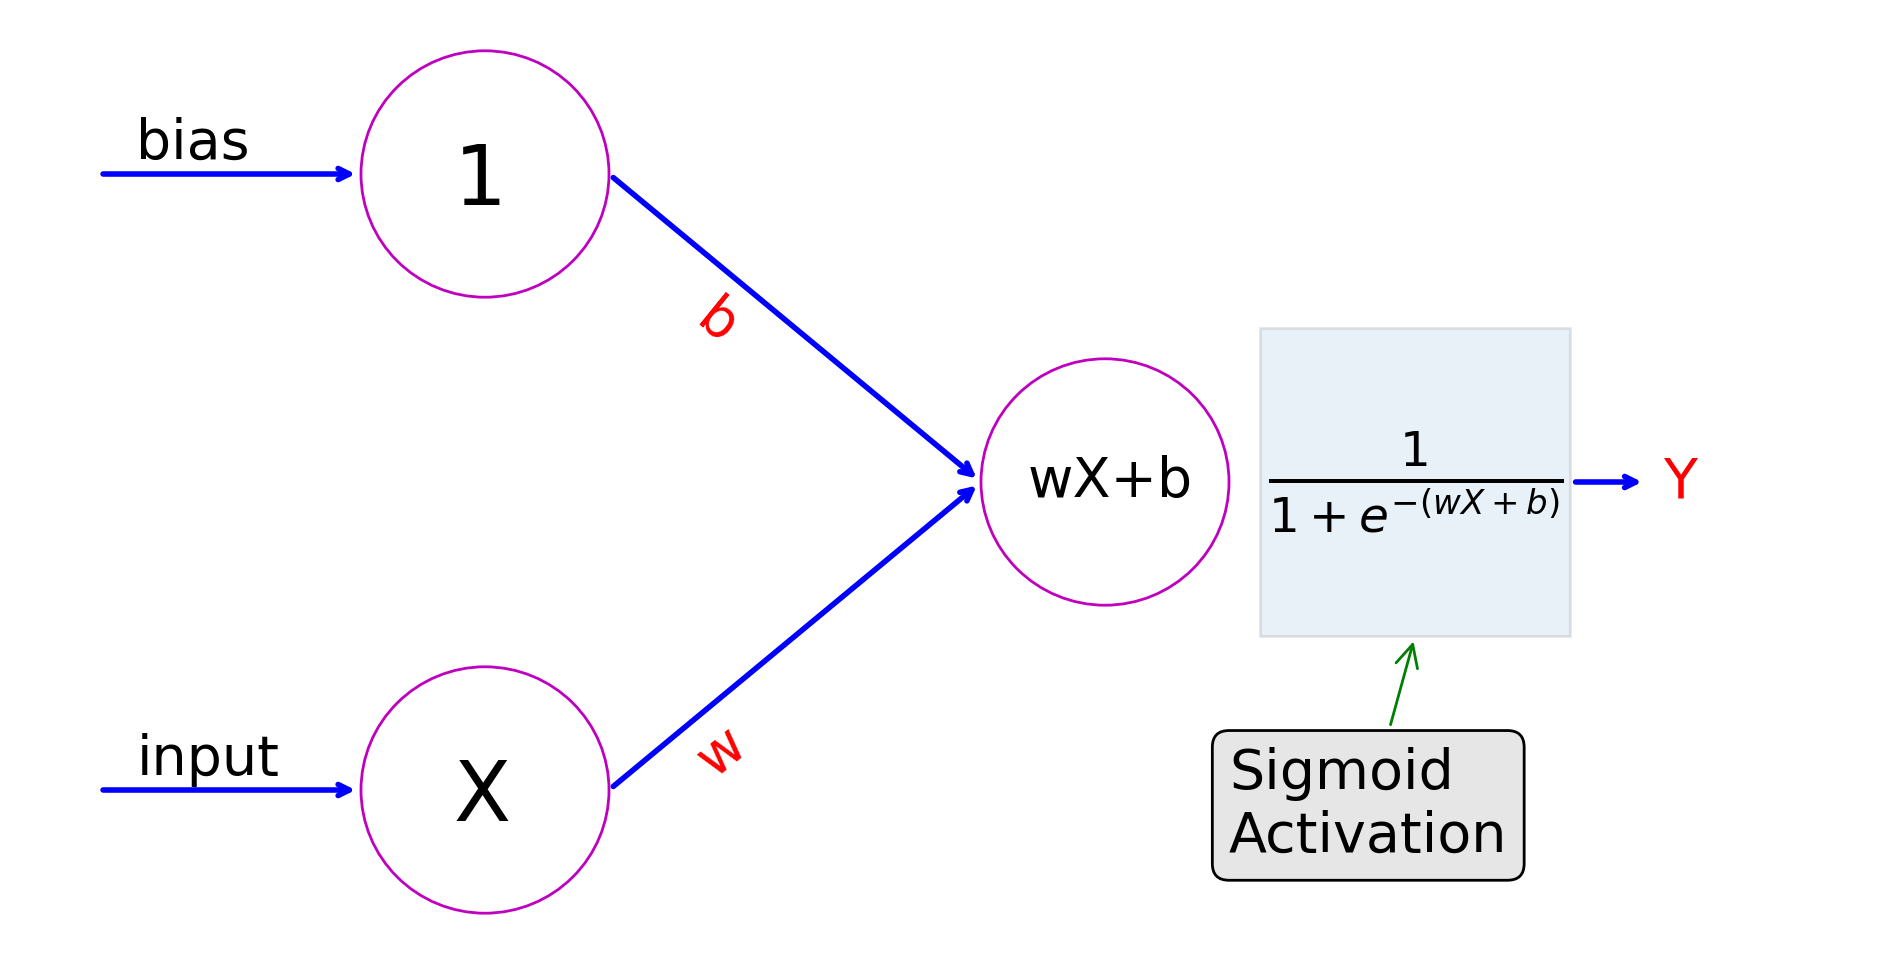

In [2]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

fig=plt.figure(figsize=(12,6),dpi=200)
ax=fig.add_subplot(111)
# Draw the two input neurons
circle=plt.Circle((-3,2),radius=0.8,color='white',ec="m")
ax.add_artist(circle)
circle=plt.Circle((-3,-2),radius=0.8,color='white',ec="m")
ax.add_artist(circle)
# Draw the output neuron
circle=plt.Circle((1,0),radius=0.8,color='white',ec="m")
ax.add_artist(circle)
# Draw connections between neurons
ax.annotate("",xy=(0.2,0),xytext=(-2.2,2),
    arrowprops=dict(arrowstyle='->',color='b',linewidth=2))
ax.annotate("",xy=(0.2,0),xytext=(-2.2,-2),
    arrowprops=dict(arrowstyle='->',color='b',linewidth=2))
ax.annotate("",xy=(-3.8,-2),xytext=(-5.5,-2),
    arrowprops=dict(arrowstyle='->',color='b',linewidth=2))
ax.annotate("",xy=(-3.8,2),xytext=(-5.5,2),
    arrowprops=dict(arrowstyle='->',color='b',linewidth=2))
ax.annotate("",xy=(4.5,0),xytext=(4,0),
    arrowprops=dict(arrowstyle='->',color='b',linewidth=2))
# Put explanation texts on the graph
plt.text(-5.25,2.1,"bias",fontsize=20,color="k")
plt.text(-5.25,-1.9,"input",fontsize=20,color="k")
plt.text(-1.7,-1.9,f"w",fontsize=20,color="r",rotation=39)
plt.text(-1.7,0.9,f"b",fontsize=20,color="r",rotation=-39)
plt.text(-3.2,1.8,"1",fontsize=30,color="k")
plt.text(-3.2,-2.2,"X",fontsize=30,color="k")
plt.text(0.5,-0.1,"wX+b",fontsize=20,color="k")
plt.text(4.6,-0.1,f"Y",fontsize=20,color="r")
plt.text(2.05,-0.1,r"$\frac{1}{1+e^{-(wX+b)}}$",
    fontsize=25,color="k")
# add text to explain 
txt=ax.annotate('Sigmoid\nActivation',xy=(3,-1), 
   xytext=(0.65,0.1),textcoords='axes fraction', 
   bbox=dict(boxstyle="round",fc="0.9"), 
   arrowprops=dict(arrowstyle='->',color='g',linewidth=1), 
   fontsize=20)
# add rectangle to plot
ax.add_patch(Rectangle((2,-1),2,2,edgecolor='k',alpha=0.1))
ax.set_xlim(-6,6)
ax.set_ylim(-3,3)
plt.axis("off")
plt.savefig("files/ch07/binary.png")

# 7.2 Process Image Data
## 7.2.1 Download Data

In [3]:
import requests
# Use the requests library to fetch the file from the URL
url='https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
file=requests.get(url)
# Download the file content
with open('files/ch07/cifar-10-python.tar.gz','wb') as f:
    f.write(file.content)

In [4]:
import tarfile
# Unzip it and save it in the subfolder /cifar10   
cifar=tarfile.open('files/ch07/cifar-10-python.tar.gz')
cifar.extractall('files/ch07/cifar10') 
cifar.close()

## 7.2.2 Convert NumPy Arrays to Pictures and Back

In [5]:
import pickle
import numpy as np

# The unpickle function from Krizhevsky's page 
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
# Use only one batch to speed up training
path="files/ch07/cifar10/cifar-10-batches-py/"
batch1=unpickle(path+"data_batch_1")
# Put b before column since they are bits literal
data=batch1[b"data"]
labels=batch1[b'labels']
# Look at ten pictures
for i in range(10):
    num = labels.count(i)
    print(f"there are {num} pictures of label {i}")     

there are 1005 pictures of label 0
there are 974 pictures of label 1
there are 1032 pictures of label 2
there are 1016 pictures of label 3
there are 999 pictures of label 4
there are 937 pictures of label 5
there are 1030 pictures of label 6
there are 1001 pictures of label 7
there are 1025 pictures of label 8
there are 981 pictures of label 9


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


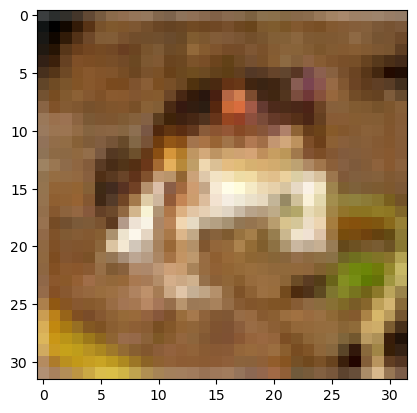

In [6]:
X=data.reshape(10000,3,32,32)
X=X.transpose(0,2,3,1).astype("uint8")
y=np.array(labels)      
# Visualize the first picture
X0=X[0]
print(X0)
plt.imshow(X0)
plt.show()       

## 7.2.3 Match Pictures with Labels

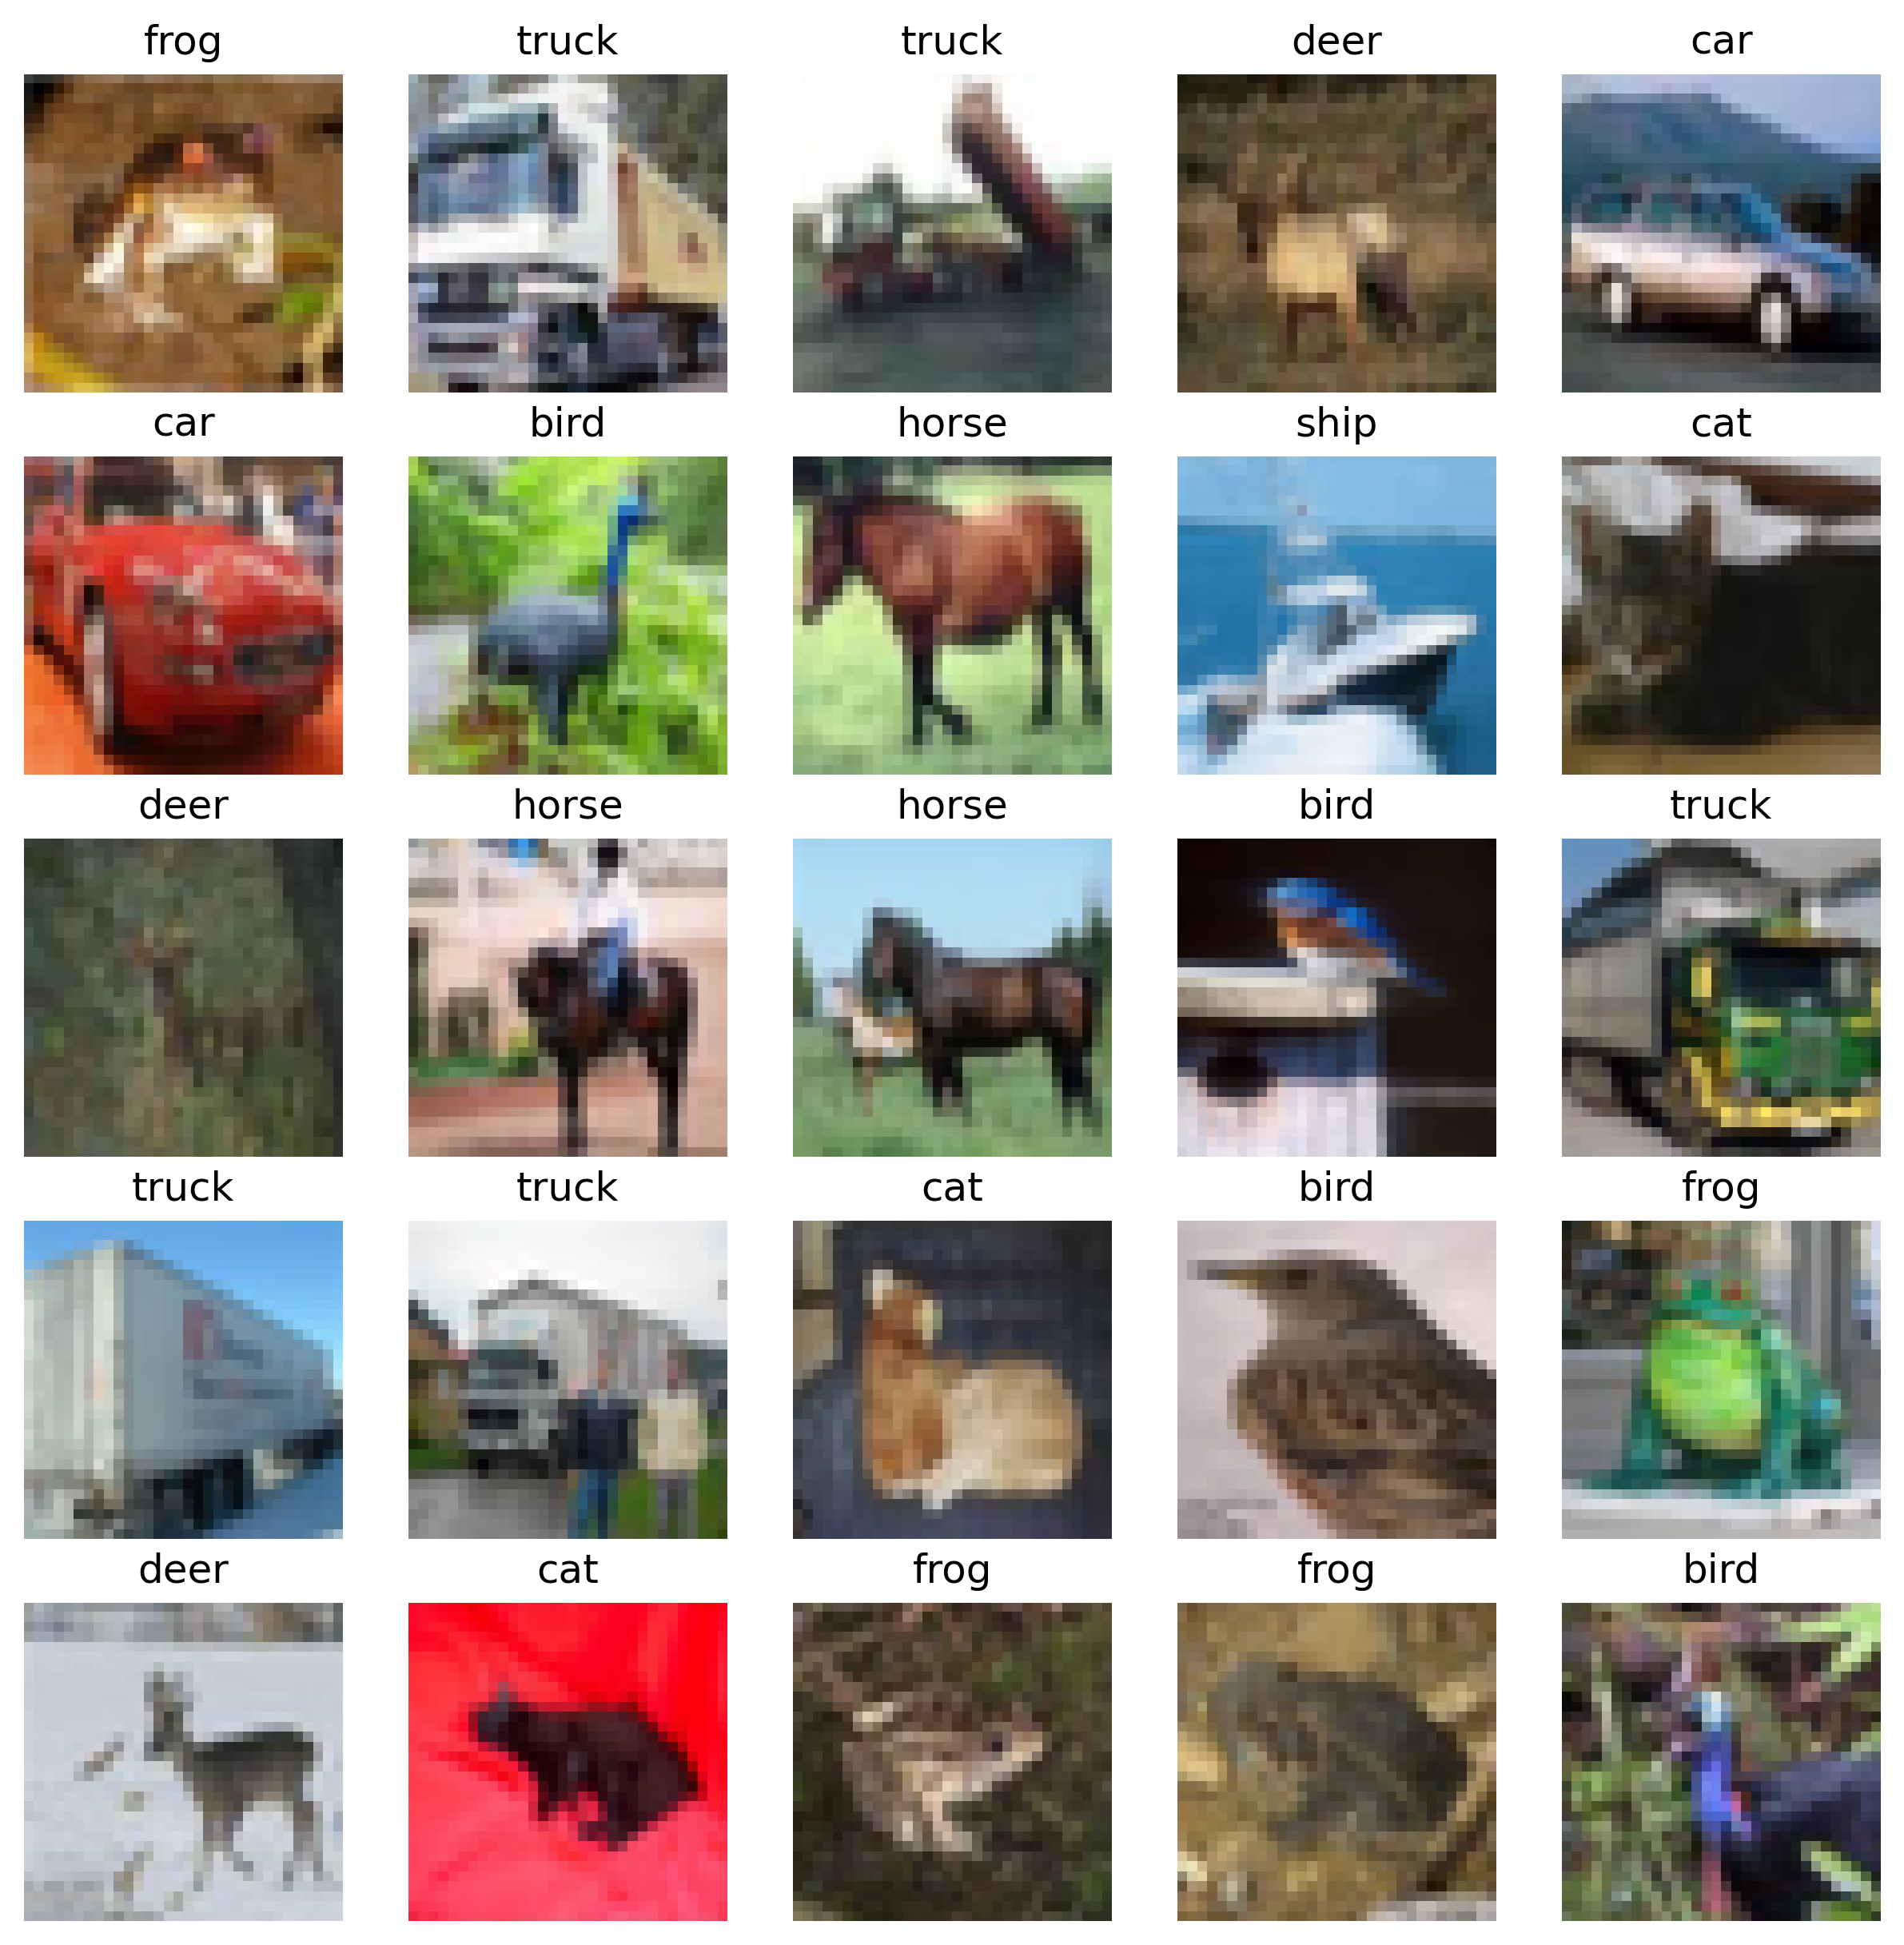

<Figure size 640x480 with 0 Axes>

In [7]:
# Names of the ten types of objects
names = ['plane', 'car', 'bird', 'cat', 'deer',
         'dog', 'frog', 'horse', 'ship', 'truck']    
# Create a 5 by 5 grid of pictures
plt.figure(figsize=(10,10),dpi=300)
for i in range(5):
    for j in range(5):
        plt.subplot(5,5, 5*i+j+1)
        plt.imshow(X[5*i+j])
        plt.axis('off')
        plt.title(names[y[5*i+j]], fontsize=12)
plt.subplots_adjust(hspace=0.20)
plt.show() 
plt.savefig("files/ch07/25pics.png")

Here we use the *axis(‘off’)* option to turn off the axis so you only see the pictures. The *subplot()* method puts the 25 pictures in a 5 by 5 matrix. We extract the name of each picture, and put it as the title of the picture, so you can see it on top of each picture here.


# 7.3 Binary Classification with A Logit Regression

## 7.3.1 Prepare the Data

In [8]:
# Keep deer and horses only
# Change y to a dummy of 1 (horse) or 0 (deer)
X=[]
y=[]
for i in range(1000):
    if labels[i]==4:
        X.append(data[i])
        y.append(0)
    if labels[i]==7:
        X.append(data[i])
        y.append(1)       
# Reshape X
X=np.array(X,dtype=float)
# change channel first to channel last
X=X.reshape(-1,3,32,32).transpose(0,2,3,1)
# Change X to a float between 0 and 1
X=X/255
# Reshpae y
y=np.array(y,dtype=float).reshape(-1,)

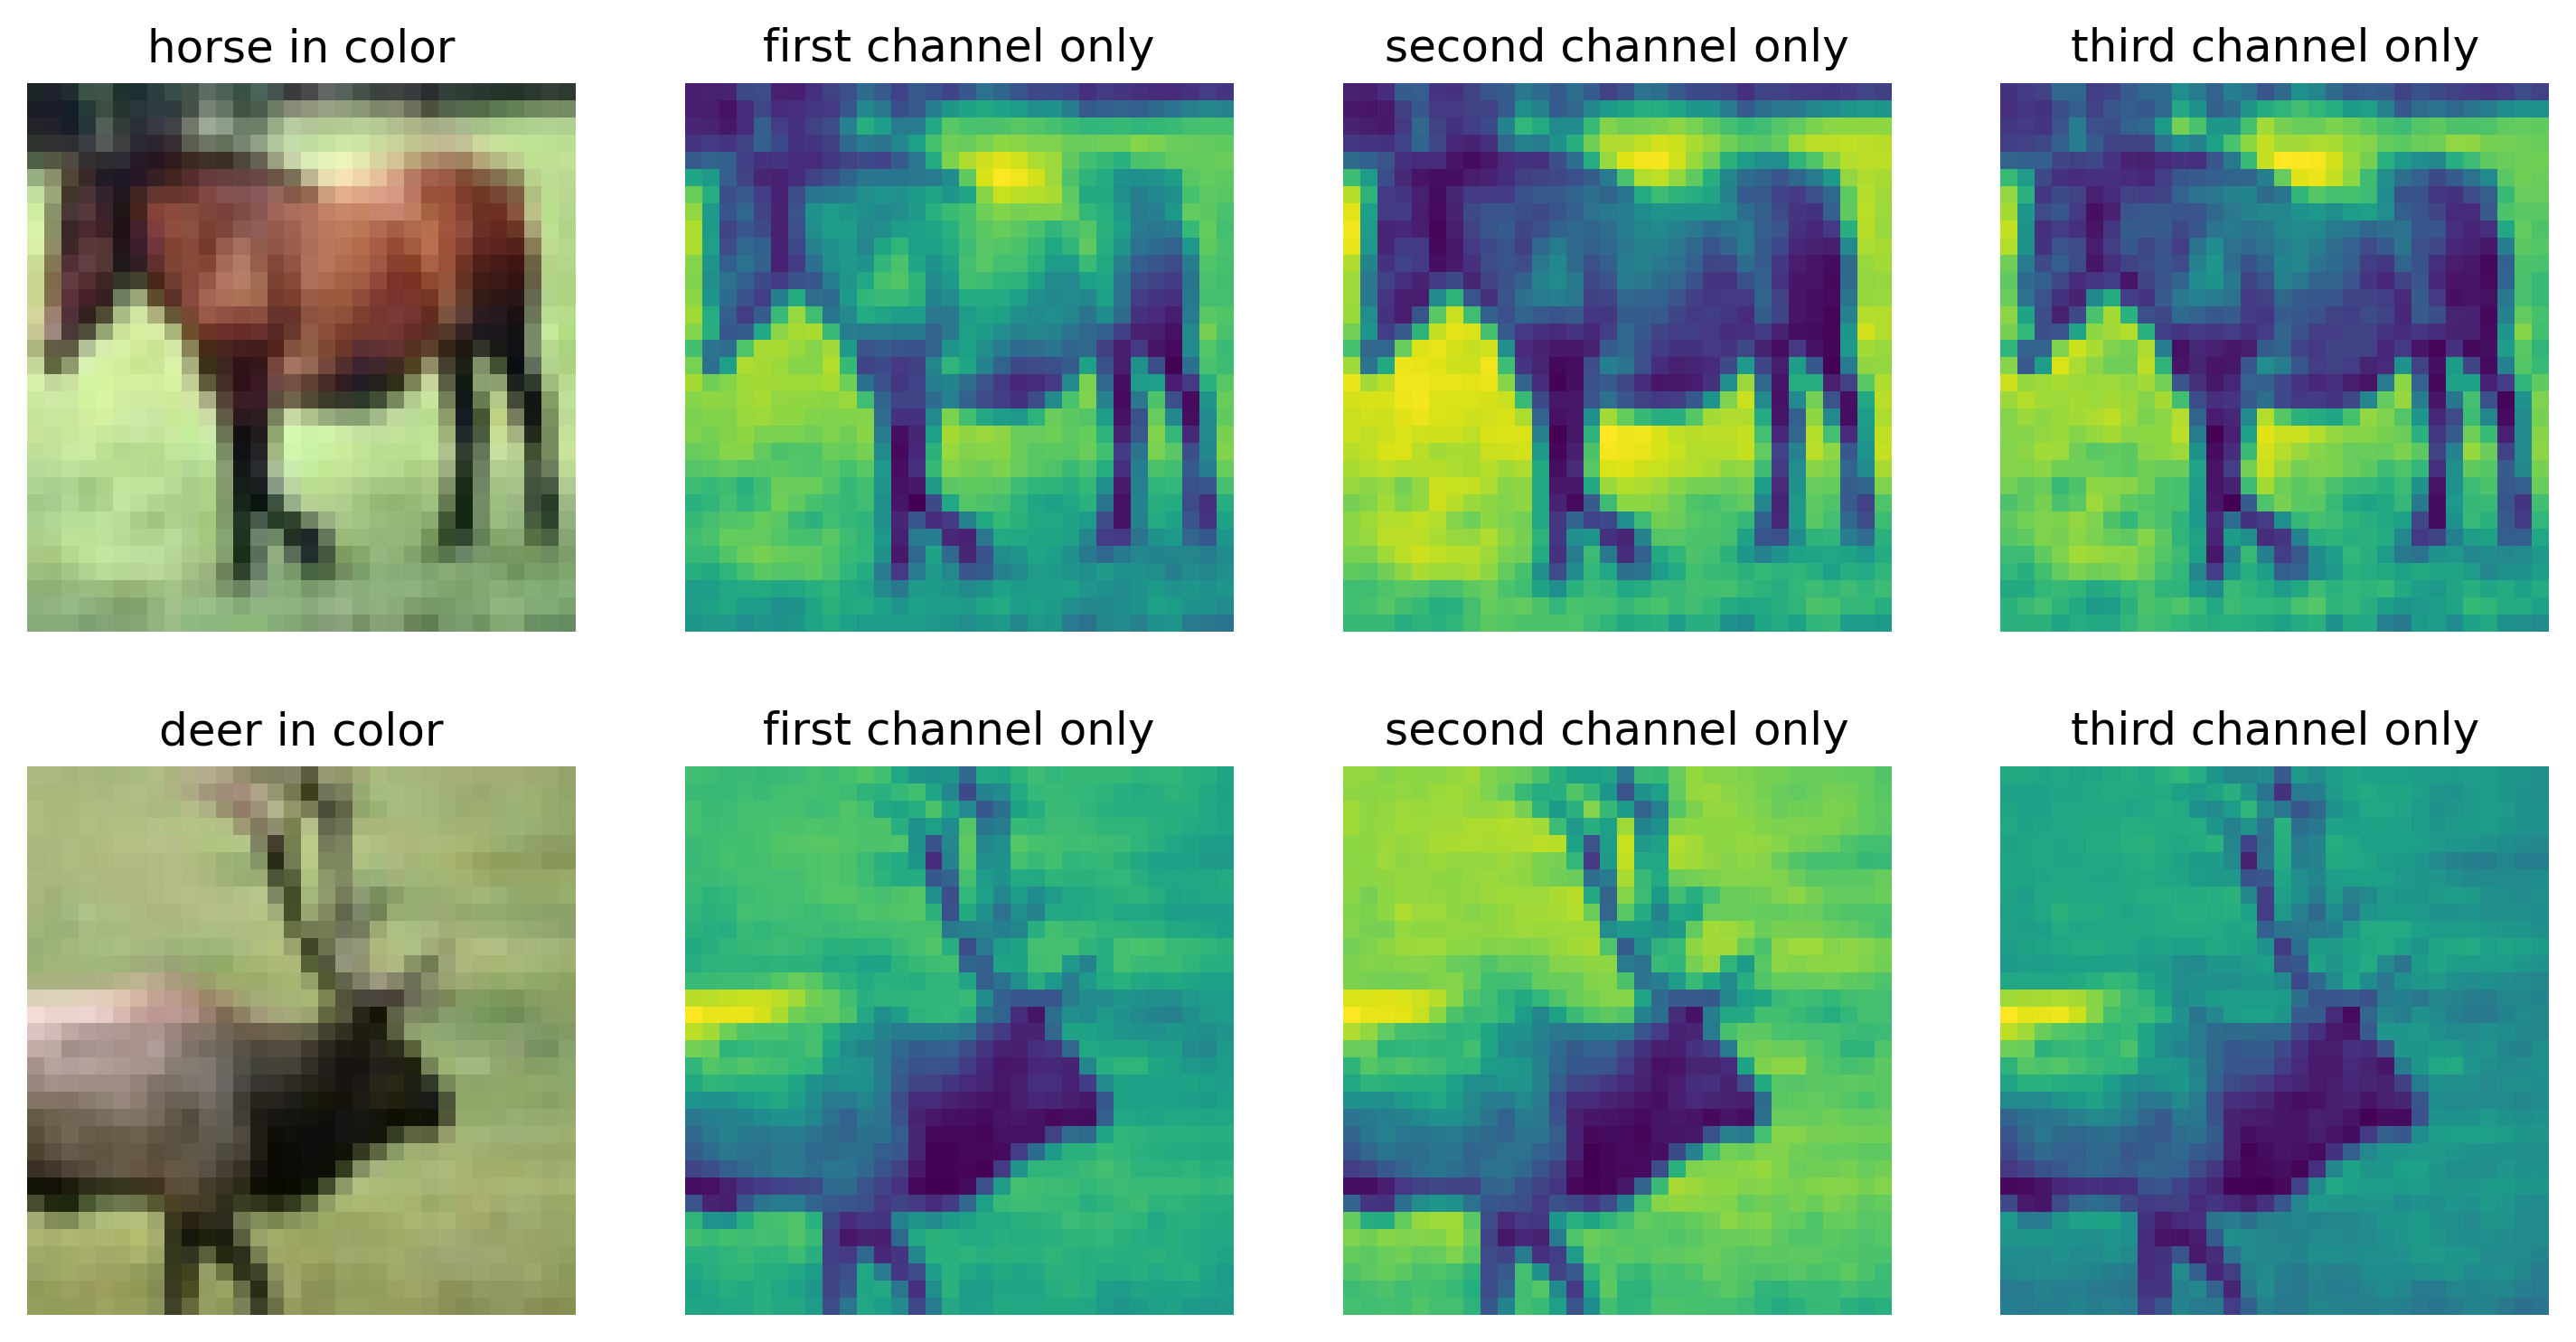

<Figure size 640x480 with 0 Axes>

In [9]:
# Select one example of horse and one example of deer
horse=X[1]
deer=X[7]
# Look at three channels separately
horse_channel1=horse[:,:,0]
horse_channel2=horse[:,:,1]
horse_channel3=horse[:,:,2]
deer_channel1=deer[:,:,0]
deer_channel2=deer[:,:,1]
deer_channel3=deer[:,:,2]
# Plot them channel by channel
horses=[horse,horse_channel1,horse_channel2,horse_channel3]
deers=[deer,deer_channel1,deer_channel2,deer_channel3]
horse_labels = ["horse in color", "first channel only", 
                "second channel only", "third channel only"]
deer_labels = ["deer in color", "first channel only", 
               "second channel only", "third channel only"]
plt.figure(figsize=(12,6),dpi=300)
for i in range(4):
    plt.subplot(2,4,i+1)
    plt.imshow(horses[i])
    plt.title(horse_labels[i], fontsize=12)
    plt.axis('off')
    plt.subplot(2,4,i+5)
    plt.imshow(deers[i])
    plt.title(deer_labels[i-4], fontsize=12)
    plt.axis('off')
plt.subplots_adjust(hspace=0.20)
plt.show()  
plt.savefig("files/ch07/channels.png")

## 7.3.2 Train the Logit Model

In [10]:
from sklearn.model_selection import train_test_split

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=0)
# Use only the first channel to reduce data size
X_train = x_train[:,:,:,0].reshape(-1,32*32)
X_test = x_test[:,:,:,0].reshape(-1,32*32)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)
# Save the data for later use
pickle.dump((X_train,X_test,y_train,y_test),
    open('files/ch07/train_test.p','wb'))

X_train shape is (160, 1024)
X_test shape is (41, 1024)
y_train shape is (160,)
y_test shape is (41,)


explain
Next we train the logit model.

In [11]:
# Logit regression;  
# Set max_iter to 5000 so that the model converges
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(max_iter=5000)
logit.fit(X_train,y_train)

The model is now trained.

We now make predictions in the out of sample testing dataset
explain the shape meaning.

## 7.3.3 Predict Using the Logit Model

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Make predictions
pred_test = logit.predict(X_test)
# Print out the confusion matrix
ma5=confusion_matrix(y_test,pred_test)
print("the confusion matrix is\n", ma5) 
# Print out the accuracy score
accuracy=accuracy_score(y_test,pred_test)
print(f"the accuracy of the prediction is {accuracy}") 

the confusion matrix is
 [[13 11]
 [ 7 10]]
the accuracy of the prediction is 0.5609756097560976


# 7.4 Binary Classification with A Simple Neural Network 

## 7.4.1 Train and Test Using A Neural Network

In [13]:
import tensorflow as tf

tf.random.set_seed(0)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,
    activation='sigmoid',input_shape=(32*32,)))
model.compile(optimizer="adam",loss="binary_crossentropy")
model.fit(X_train,y_train,verbose=0,epochs=125)

Next, we make predictions... 

In [14]:
pred_model=model.predict(X_test)
# Convert values between 0 and 1 to Y or N 
pred_yn=np.where(pred_model>0.5,1,0)
ma5=confusion_matrix(y_test,pred_yn)
print("the confusion matrix is\n", ma5) 
# Print out the accuracy score
accuracy=accuracy_score(y_test,pred_yn)
print(f"the accuracy of the prediction is {accuracy}") 

2/2 [==============================] - 0s 2ms/step
the confusion matrix is
 [[11 13]
 [ 4 13]]
the accuracy of the prediction is 0.5853658536585366


## 7.4.2 Focus on Two Examples


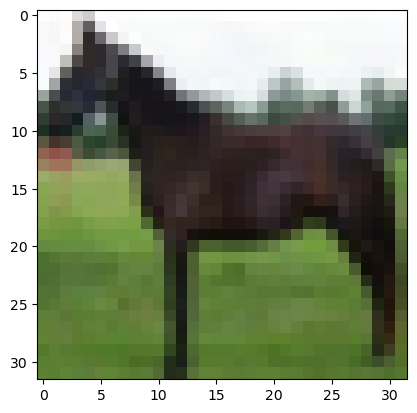

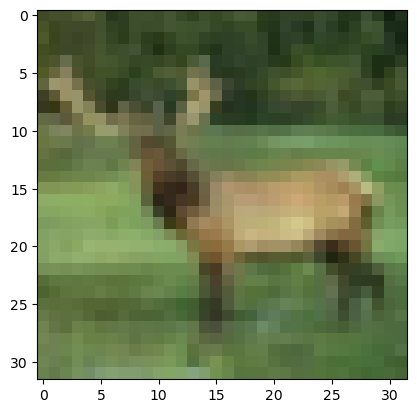

In [15]:
# A picture of a horse
plt.imshow(x_test[9])
plt.show()
# A picture of a deer
plt.imshow(x_test[2])
plt.show()
# Save the two examples for later use
pickle.dump((x_test[9], x_test[2]),
            open('files/ch07/horsedeer.p','wb'))

## 7.4.3 Diagrams of the Network and Predictions

We now look under the hood and dive into the model. Specifically, we'll keep all the data in the intermediate steps of the training process. We obtain the weights of the model and the predicted probabilities of the above two pictures being a horse before training. We then again obtain the information after 5 epochs, 10 epochs ... 125 epochs.

In [16]:
# create lists for weights and epochs
ws=[]
bs=[]
epochs=[]
p_horse=[]
p_deer=[]
# record weights before training
tf.random.set_seed(0)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,
    activation='sigmoid',input_shape=(32*32,)))
model.compile(optimizer="adam",loss="binary_crossentropy")
w0, bias0 = model.layers[-1].get_weights()
bs.append(bias0[0])
ws.append(w0.reshape(1024,))
epochs.append(0)
# record predictions before training
pred_horse=model.predict(X_test[9].reshape(-1,1024))
pred_deer=model.predict(X_test[2].reshape(-1,1024))
p_horse.append(pred_horse[0,0])
p_deer.append(pred_deer[0,0])

1/1 [==============================] - 0s 22ms/step


In [17]:
# Train 5 epochs at a time
for i in range(1,26,1):
    model.fit(X_train,y_train,verbose=0,epochs=5)
    # record weights after training
    w,bias=model.layers[-1].get_weights()
    bs.append(bias[0])
    ws.append(w.reshape(1024,))
    epochs.append(i*5)
    # record predictions after training
    pred_horse=model.predict(X_test[9].reshape(-1,1024))
    pred_deer=model.predict(X_test[2].reshape(-1,1024))
    p_horse.append(pred_horse[0,0])
    p_deer.append(pred_deer[0,0])   

1/1 [==============================] - 0s 11ms/step


In [18]:
from utils.ch07util import horse_pic

# Call the horse() function
horse_pic(p_horse,ws,bs,epochs,x_test[9])

You can go to the local folder to see the 26 pictures generated by the program above. For example, if you open the picture p_horse0.png, you'll see the weights of the model, plus the model's prediction on the horse picture, before training starts, as below: 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_horse0.png" />

The picture shows that before training, the model assigns a 34.74% chance that the picture above is a horse. Now, if you look at the picture p_horse25.png, you'll see the weights of the model, plus the model's prediction on the horse picture after 125 epochs of training, as below: 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_horse25.png" />

The probability has increased to 88%. 


## 7.4.4 Animate the Training Process

In [19]:
import imageio, PIL

frames=[]
for i in range(26):
    frame=PIL.Image.open(f"files/ch07/p_horse{i}.png")
    frame=np.asarray(frame)
    frames.append(np.array(frame))
imageio.mimsave('files/ch07/p_horse.gif', frames, duration=300)

After running the above code, you'll see a video as follows:
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_horse.gif" />

After 125 epochs of training, the model predicts that there is an 88% chance that the picture is a horse. 

## 7.4.5 Animate the Predictions for the Deer

We can also plot how the prediction for the deer changes.

In [20]:
from utils.ch07util import deer_pic

deer_pic(p_deer,ws,bs,epochs,x_test[2])

In the picture p_deer0.png, you'll see the weights of the model, plus the model's prediction on the deer picture, before training, as follows: 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_deer0.png" />

The picture shows that before training, the model assigns a 39.76% chance that the picture is a horse. This is equivalent to predicting that the picture is a deer with a 60.24% probability. Now, if you look at the picture p_deer25.png, you'll see the weights of the model, plus the model's prediction on the picture after 125 epochs of training, as follows: 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_deer25.png" />

The model now places a 94.08% probability that the picture is a deer, a very good prediction! 

Better yet, we can create an animation to show the whole process


In [21]:
frames=[]
for i in range(26):
    frame=PIL.Image.open(f"files/ch07/p_deer{i}.png")
    frame=np.asarray(frame)
    frames.append(np.array(frame))
imageio.mimsave('files/ch07/p_deer.gif',frames,duration=300)

You'll see an animation as follows 
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_deer.gif" />

# 7.5 Combine the Animations 

## 7.5.1 Animate the Two Predictions


In [22]:
frames=[]
for i in range(26):
    frame1=PIL.Image.open(f"files/ch07/p_horse{i}.png")
    frame1=np.asarray(frame1)
    frame2=PIL.Image.open(f"files/ch07/p_deer{i}.png")
    frame2=np.asarray(frame2) 
    frame=np.concatenate([frame1, frame2], axis=1)
    frames.append(np.array(frame))
imageio.mimsave('files/ch07/p_horse_deer.gif',frames,duration=300)    

After running it, you'll see an animation as follows
<img src="https://gattonweb.uky.edu/faculty/lium/ml/p_horse_deer.gif" />

## 7.5.2 Subplots

In [23]:
rows=[0,8,16,25]
cols=["horse","deer"]
plt.figure(dpi=300,figsize=(28,40))
for i in range(4):
    for j in range(2):
        plt.subplot(4,2,2*i+j+1)
        img=f"files/ch07/p_{cols[j]}{rows[i]}.png"
        nparray=PIL.Image.open(img)
        plt.imshow(nparray)
        plt.axis("off")
plt.subplots_adjust(hspace=-0.06,wspace=-0.2)
plt.savefig('files/ch07/horsedeer.png')
plt.show()

# 7.6 Binary Classification with A Deep Neural Network 

In [24]:
tf.random.set_seed(0)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1024,activation='relu',
                                input_shape=(32*32,)))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer="adam",loss="binary_crossentropy")
model.fit(X_train,y_train,verbose=0,epochs=125)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 32)                32800     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,082,433
Trainable params: 1,082,433
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
pred_model=model.predict(X_test)
# Convert values between 0 and 1 to Y or N 
pred_yn=np.where(pred_model>0.5,1,0)
ma5=confusion_matrix(y_test,pred_yn) 
print("the confusion matrix is\n", ma5) 
accuracy=accuracy_score(y_test,pred_yn)
print(f"the accuracy of the prediction is {accuracy}") 

2/2 [==============================] - 0s 2ms/step
the confusion matrix is
 [[15  9]
 [ 7 10]]
the accuracy of the prediction is 0.6097560975609756


# 7.7 Appendix: Load the CIFAR10 Dataset from Tensorflow Directly
You can easily load up the CIFAR10 dataset directly by using the ***tensorflow*** library. Here is how.

In [26]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

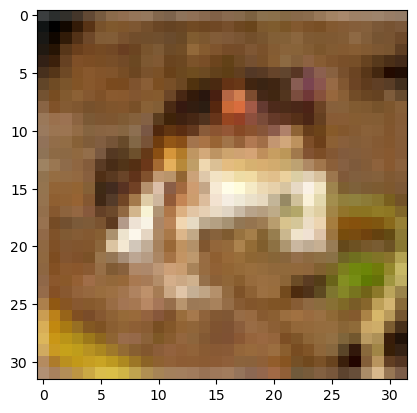

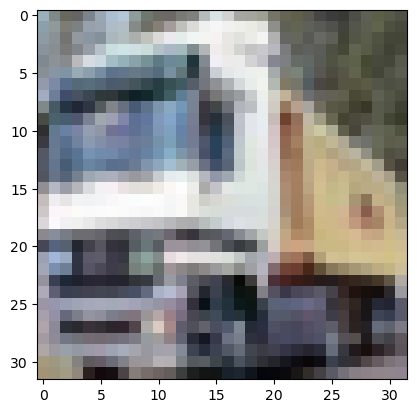

In [27]:
# Look at the first two pictures
pic1=x_train[0]
pic2=x_train[1]
plt.imshow(pic1)
plt.show()  
plt.imshow(pic2)  
plt.show()

# 7.9 Exercises

[[[0.38823529 0.65098039 0.77647059]
  [0.38431373 0.64705882 0.76862745]
  [0.39215686 0.65490196 0.78039216]
  ...
  [0.50588235 0.72941176 0.83137255]
  [0.51764706 0.74509804 0.84313725]
  [0.50980392 0.7372549  0.83529412]]

 [[0.39215686 0.65098039 0.76470588]
  [0.39215686 0.64313725 0.76078431]
  [0.4        0.65490196 0.77254902]
  ...
  [0.47843137 0.59607843 0.6627451 ]
  [0.52941176 0.74117647 0.83529412]
  [0.51764706 0.7372549  0.83921569]]

 [[0.40784314 0.6627451  0.77254902]
  [0.40784314 0.65490196 0.76470588]
  [0.41568627 0.66666667 0.77647059]
  ...
  [0.64705882 0.64705882 0.62745098]
  [0.58431373 0.74117647 0.80392157]
  [0.54901961 0.74117647 0.83137255]]

 ...

 [[0.76470588 0.67843137 0.58431373]
  [0.78039216 0.69411765 0.6       ]
  [0.86666667 0.76078431 0.65098039]
  ...
  [0.81960784 0.74901961 0.6627451 ]
  [0.81960784 0.74509804 0.67058824]
  [0.81568627 0.7372549  0.67843137]]

 [[0.77254902 0.67843137 0.58431373]
  [0.78823529 0.69803922 0.58431373]


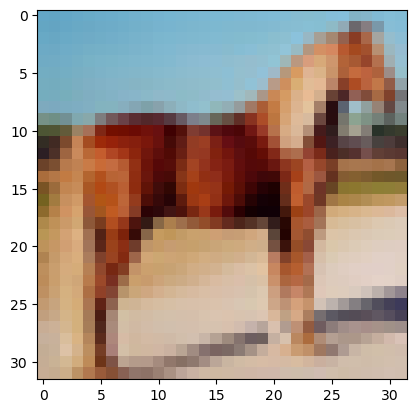

In [28]:
# answer to question 7.3
      
# Visualize the 10th picture
X9=X[9]
print(X9)
plt.imshow(X9)
plt.show()  

X_train shape is (160, 1024)
X_test shape is (41, 1024)
y_train shape is (160,)
y_test shape is (41,)


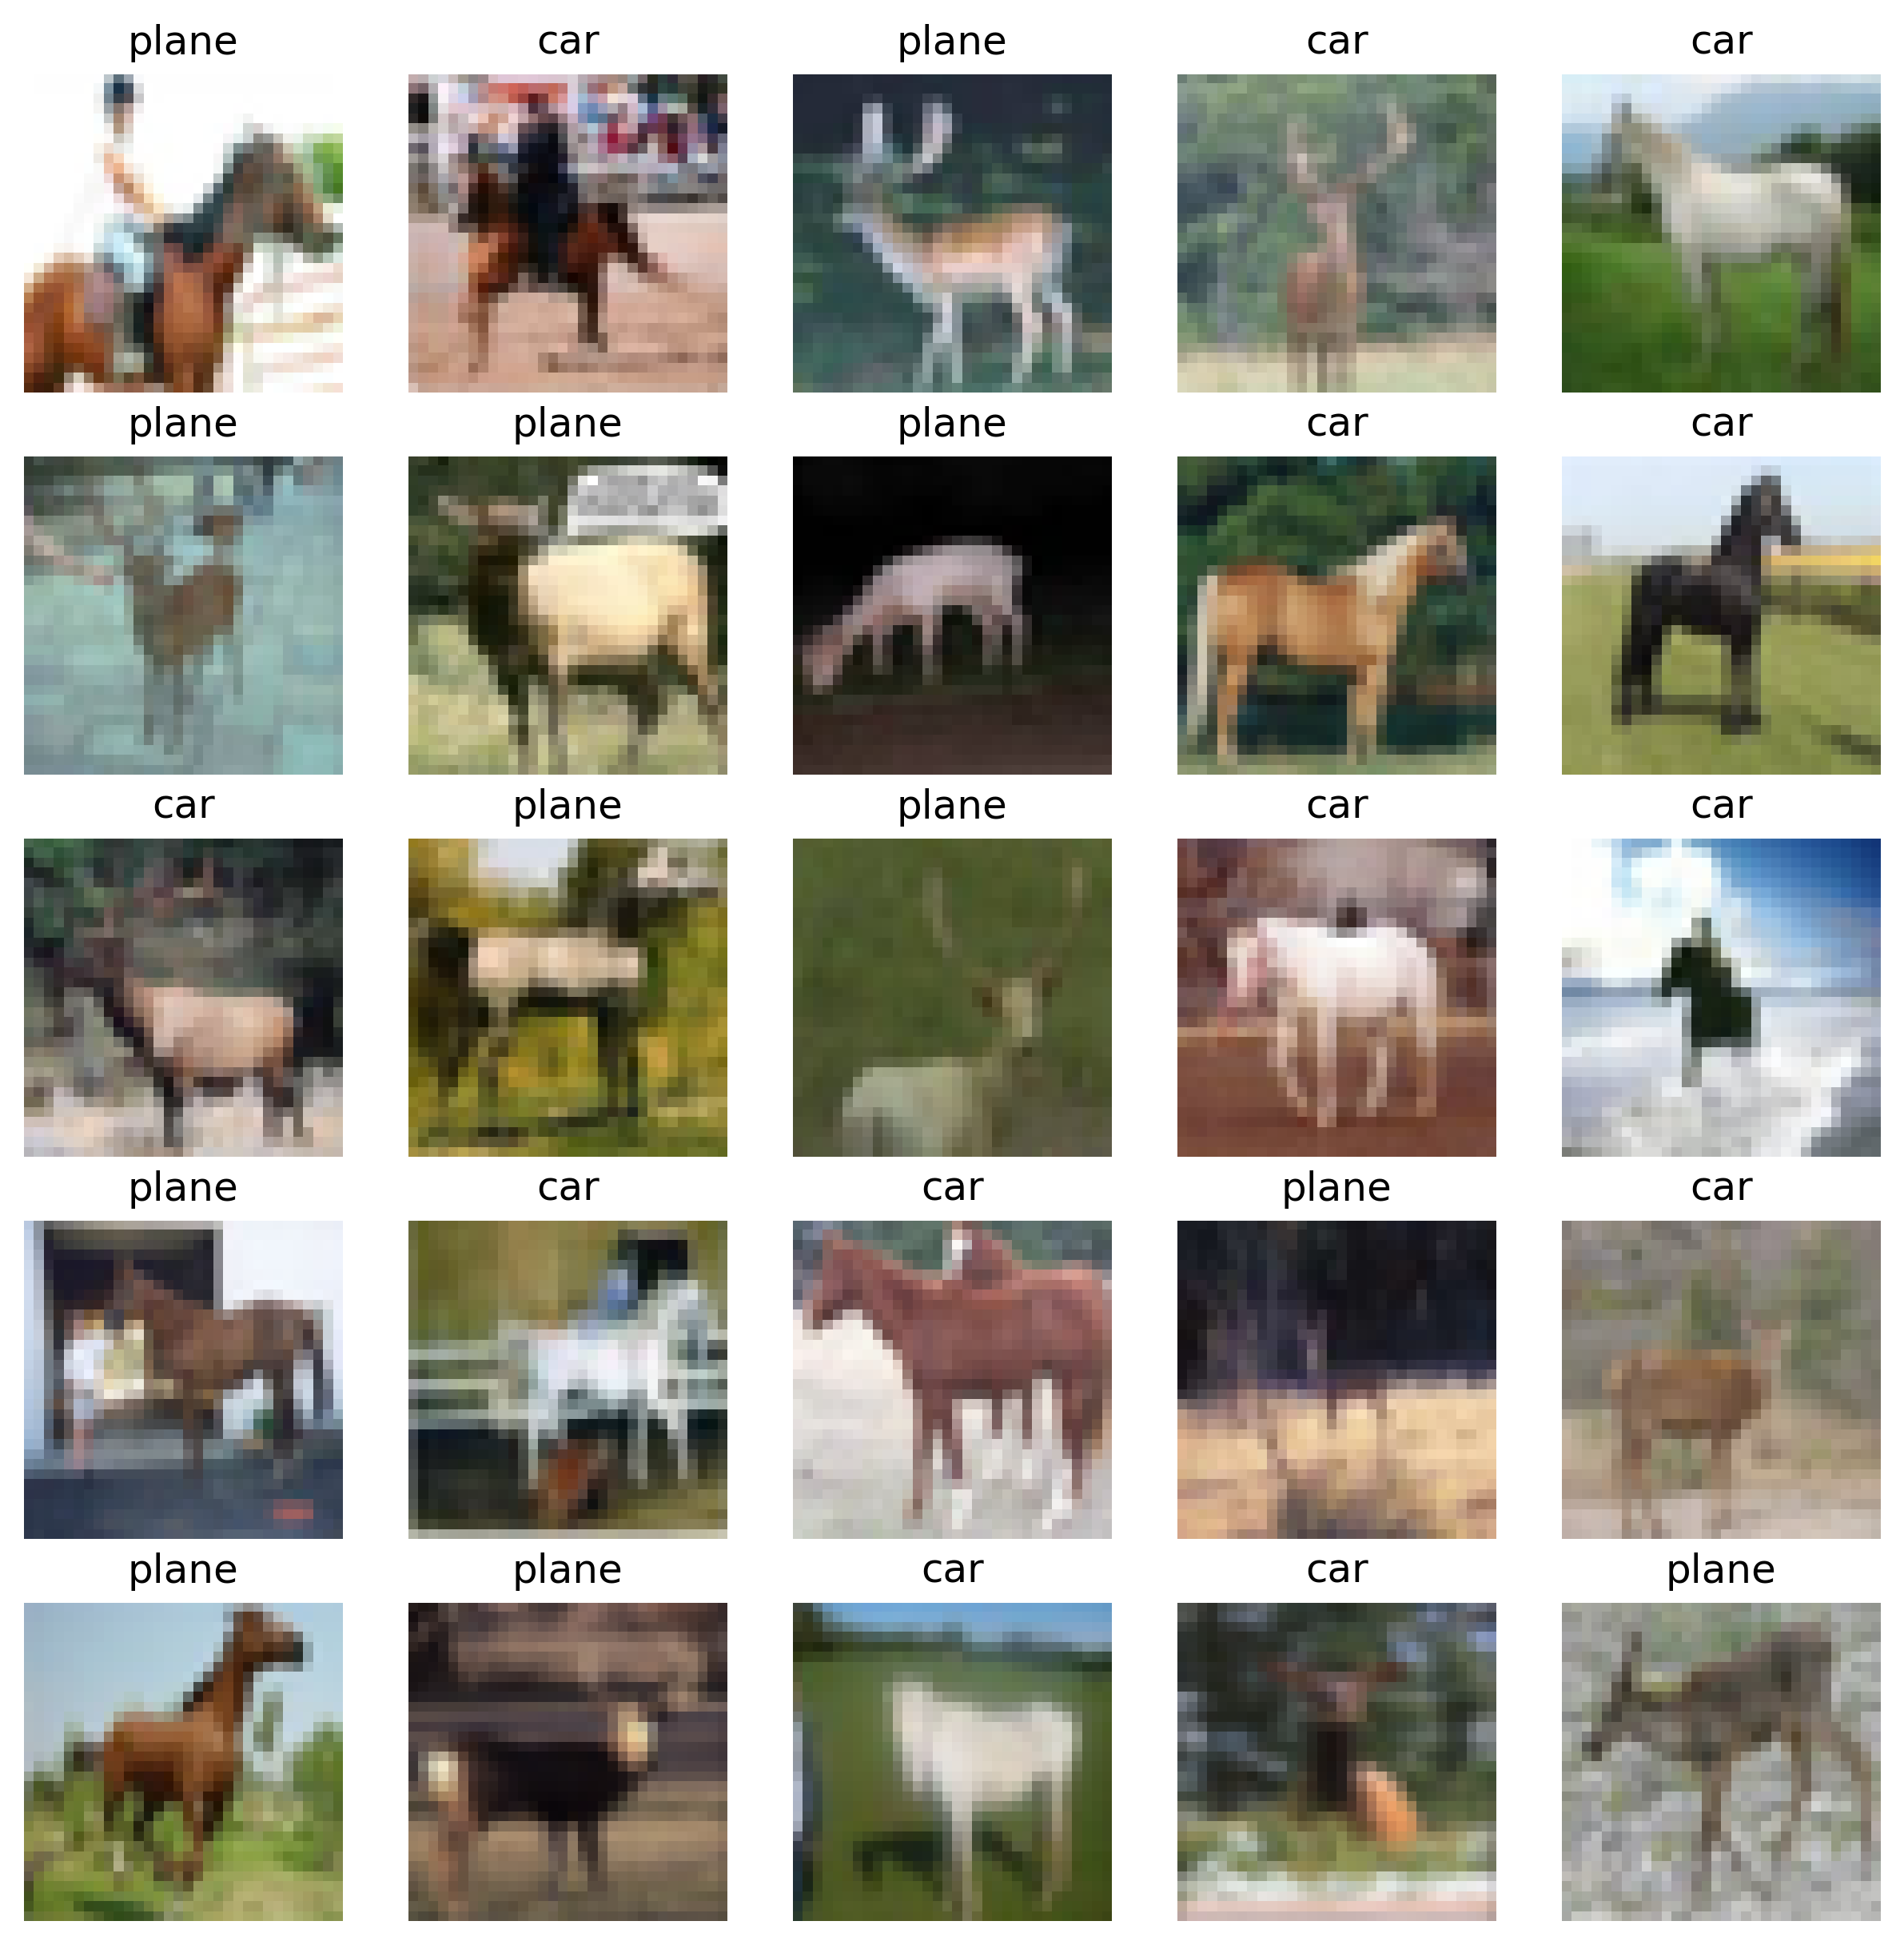

In [29]:
# answer to question 7.4
# Keep deer and horses only
# Change y to a dummy of 1 (horse) or 0 (deer)
X=[]
y=[]
for i in range(1000):
    if labels[i]==4:
        X.append(data[i])
        y.append(0)
    if labels[i]==7:
        X.append(data[i])
        y.append(1)       
# Reshape X
X=np.array(X,dtype=float)
# change channel first to channel last
X=X.reshape(-1,3,32,32).transpose(0,2,3,1)
# Change X to a float between 0 and 1
X=X/255
# Reshpae y
y=np.array(y,dtype=float).reshape(-1,)

from sklearn.model_selection import train_test_split

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=0)
# Use only the first channel to reduce data size
X_train = x_train[:,:,:,0].reshape(-1,32*32)
X_test = x_test[:,:,:,0].reshape(-1,32*32)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)
# Names of the ten types of objects
names = ['plane', 'car', 'bird', 'cat', 'deer',
         'dog', 'frog', 'horse', 'ship', 'truck']    

# Create a 5 by 5 grid of pictures
plt.figure(figsize=(10,10),dpi=300)
for i in range(5):
    for j in range(5):
        plt.subplot(5,5, 5*i+j+1)
        plt.imshow(X[5*i+j+25])
        plt.axis('off')
        plt.title(names[int(y[5*i+j])], fontsize=12)
plt.subplots_adjust(hspace=0.20)
plt.show() 
#plt.savefig("files/ch07/25pics.png")

In [30]:
# answer to question 7.8



# Keep deer and horses only
# Change y to a dummy of 1 (horse) or 0 (deer)
X=[]
y=[]
for i in range(1000):
    if labels[i]==4:
        X.append(data[i])
        y.append(0)
    if labels[i]==7:
        X.append(data[i])
        y.append(1)       
# Reshape X
X=np.array(X,dtype=float)
# change channel first to channel last
X=X.reshape(-1,3,32,32).transpose(0,2,3,1)
# Change X to a float between 0 and 1
X=X/255
# Reshpae y
y=np.array(y,dtype=float).reshape(-1,)

from sklearn.model_selection import train_test_split

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=0)
# Use only the first channel to reduce data size
X_train = x_train[:,:,:,0].reshape(-1,32*32)
X_test = x_test[:,:,:,0].reshape(-1,32*32)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)




tf.random.set_seed(0)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1024,activation='relu',
                                input_shape=(32*32,)))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer="adam",loss="binary_crossentropy")
model.fit(X_train,y_train,verbose=0,epochs=125)
print(model.summary())

pred_model=model.predict(X_test)
# Convert values between 0 and 1 to Y or N 
pred_yn=np.where(pred_model>0.5,1,0)
ma5=confusion_matrix(y_test,pred_yn) 
print("the confusion matrix is\n", ma5) 
accuracy=accuracy_score(y_test,pred_yn)
print(f"the accuracy of the prediction is {accuracy}") 

X_train shape is (160, 1024)
X_test shape is (41, 1024)
y_train shape is (160,)
y_test shape is (41,)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_10 (Dense)            (None, 32)                32800     
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,082,945
Trainable params: 1,082,945
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 2ms/step
the confusion matr